<a href="https://colab.research.google.com/github/tselest/ML_DL_projects/blob/main/MNIST_tuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
!pip install -U keras-tuner

     |████████████████████████████████| 71kB 3.2MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=1761e5fef89a4da7ea83d809d6c5813e9e4a4586c61b3f743744fc7f5903729c
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=4df4bb79f16e10daa432799238221112747f8d61a1efdafddf27ff7ce6b4f556
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [70]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [34]:
print(tf.__version__)

2.4.1


## 1. MNIST Dataset



MNIST is the "Hello World" of Deep Learning. It uses grayscale images of handwritten images (28x28 pixels) from 10 categories (0 through 9), in an effort to classify them.

The MNIST dataset has 60,000 training images and 10,000 test images. It comes preloaded in Keras, in the form of a set of four NumPy arrays. Additionaly, all values of MNIST are pre-normalized (between 0-1).

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
print(f"X_train shape is {X_train.shape} & X_test's is {X_test.shape}")
print(f"y_train shape is {y_train.shape} & y_test's is {y_test.shape}")

X_train shape is (60000, 28, 28) & X_test's is (10000, 28, 28)
y_train shape is (60000,) & y_test's is (10000,)


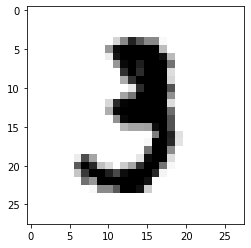

In [22]:
digit = X_train[10]
plt.imshow(digit, cmap=plt.cm.binary) #image is greyscale, but plt by default uses the viridis colorscheme :|

In [21]:
y_train[10]

3

## 2. Data Preprocessing

In [26]:
# Numerical to categorical using one-hot-encoding
y_trn = to_categorical(y_train, num_classes=10)
y_tst = to_categorical(y_test, num_classes=10)

y_trn[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
# Normalizing data - 0 to 1
X_train = X_train/255
X_test = X_test/255

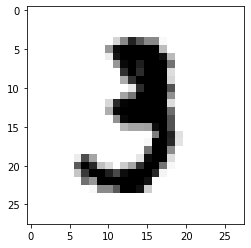

In [29]:
digit = X_train[10]
plt.imshow(digit, cmap=plt.cm.binary)

In [30]:
# Reshaping as there is only one color channel
# (batch_size, width, height, color_channel)

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

## 3. CNN Baseline Model 



In [40]:
classifier = Sequential()
# Input shape should match with the shape of the image, i.e. 28x28x1
classifier.add(Conv2D(filters = 32, 
                      kernel_size = (4,4), 
                      input_shape=(28,28,1),
                      activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten()) # Flatten data

classifier.add(Dense(128, activation='relu'))

classifier.add(Dense(10, activation='softmax')) # 10 as there are 10 classes, softmax as multiple classes. 

classifier.compile(loss='categorical_crossentropy', 
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [41]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

classifier.fit(X_train, y_trn, epochs=10, validation_data=(X_test, y_tst),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2828 - accuracy: 0.9171 - val_loss: 0.0522 - val_accuracy: 0.9821
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0470 - accuracy: 0.9854 - val_loss: 0.0377 - val_accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0312 - accuracy: 0.9910 - val_loss: 0.0411 - val_accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0427 - val_accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0438 - val_accuracy: 0.9867


In [48]:
classifier.metrics_names

['loss', 'accuracy']

In [43]:
metrics = pd.DataFrame(classifier.history.history)

metrics

,loss,accuracy,val_loss,val_accuracy
0,0.137796,0.959200,0.052230,0.9821
1,0.047997,0.985033,0.037717,0.9867
2,0.030125,0.990950,0.041068,0.9872
3,0.020946,0.993433,0.042746,0.9872
4,0.014549,0.995233,0.043841,0.9867


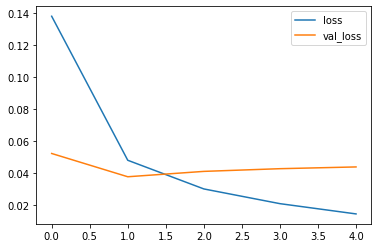

In [44]:
metrics[['loss','val_loss']].plot()

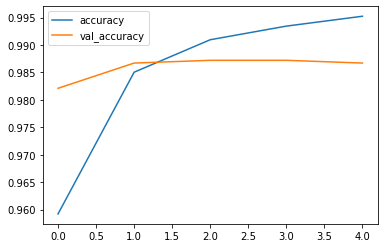

In [46]:
metrics[['accuracy','val_accuracy']].plot()

In [49]:
classifier.evaluate(X_test, y_tst, 
                    verbose=0)

[0.043840955942869186, 0.9866999983787537]

In [51]:
preds = classifier.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [53]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



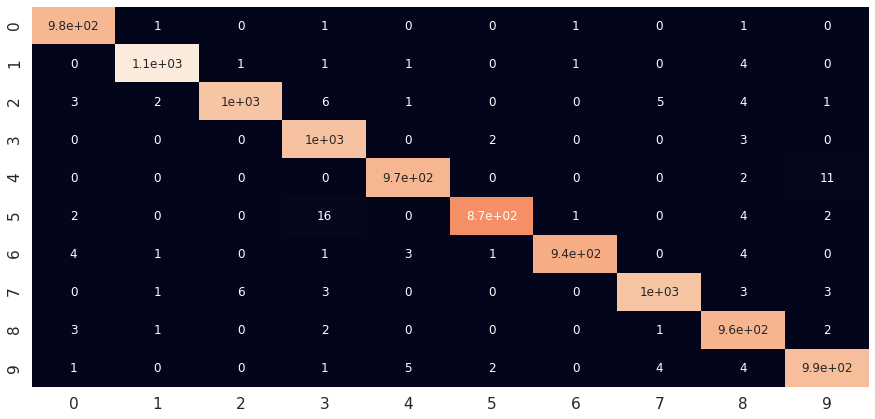

In [64]:
conf = confusion_matrix(y_test, preds)
plt.figure(figsize=(15,7))
sns.set(font_scale=1.4) 
sns.heatmap(conf, annot=True, annot_kws={"size": 12}, cbar=False) 


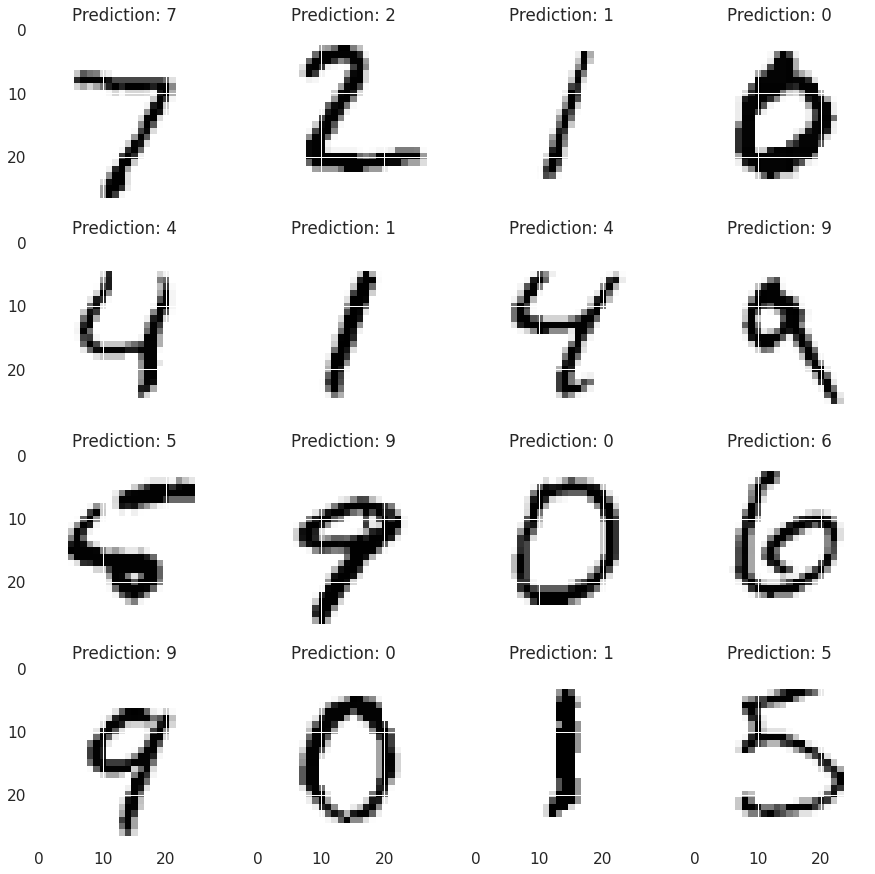

In [117]:
def predict(model, X, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'Prediction: {y_pred}')

predict(classifier, X_test, 16)

## 4. CNN Keras-Tuner model

In [74]:
def build_classifier(hp):
  tuned_classifier = Sequential([
                                 Conv2D(
                                     filters = hp.Int('Conv_1_filter', min_value=32,
                                                      max_value=128, step=16),
                                        kernel_size=hp.Choice('Conv_1_kernel', values = [3,5]),
                                        activation='relu',
                                        input_shape = (28, 28, 1)
                                 ),

                                 Conv2D(
                                     filters = hp.Int('Conv_2_filter', min_value=32,
                                                      max_value=64, step=16),
                                        kernel_size=hp.Choice('Conv_2_kernel', values = [3,5]),
                                        activation='relu'
                                 ),

                                 Flatten(),

                                 Dense(units = hp.Int('Dense_1_units', min_value=32,
                                                      max_value=128, step=16),
                                       activation='relu'
                                 ),

                                 Dense(10, activation='softmax')
    ])

  classifier.compile(loss='sparse_categorical_crossentropy', 
                   optimizer = tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                   metrics = ['accuracy'])

  return classifier

In [75]:
tuner = RandomSearch(build_classifier,
                     objective='val_accuracy',
                     max_trials=10
                     )

In [77]:
tuner.search(X_train, y_train, epochs=10, validation_split=0.1)

Trial 11 Complete [00h 05m 27s]
val_accuracy: 0.9891666769981384

Best val_accuracy So Far: 0.9983333349227905
Total elapsed time: 00h 55m 58s
INFO:tensorflow:Oracle triggered exit


In [78]:
best = tuner.get_best_models(num_models=1)[0]
best.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [85]:
best.evaluate(X_test, y_test, 
                    verbose=0)

[0.04255763441324234, 0.9896000027656555]

In [86]:
kt_preds = best.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [87]:
print(classification_report(y_test, kt_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



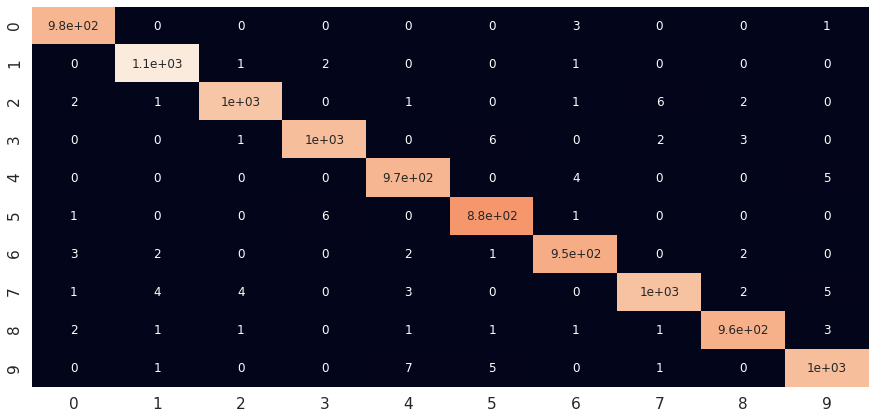

In [88]:
kt_conf = confusion_matrix(y_test, kt_preds)
plt.figure(figsize=(15,7))
sns.set(font_scale=1.4) 
sns.heatmap(kt_conf, annot=True, annot_kws={"size": 12}, cbar=False) 

Comparing the confusion matrices of the baseline model and the tuned algorithm, we see that the one that used keras-tuner has fewer misclassifications. Great!

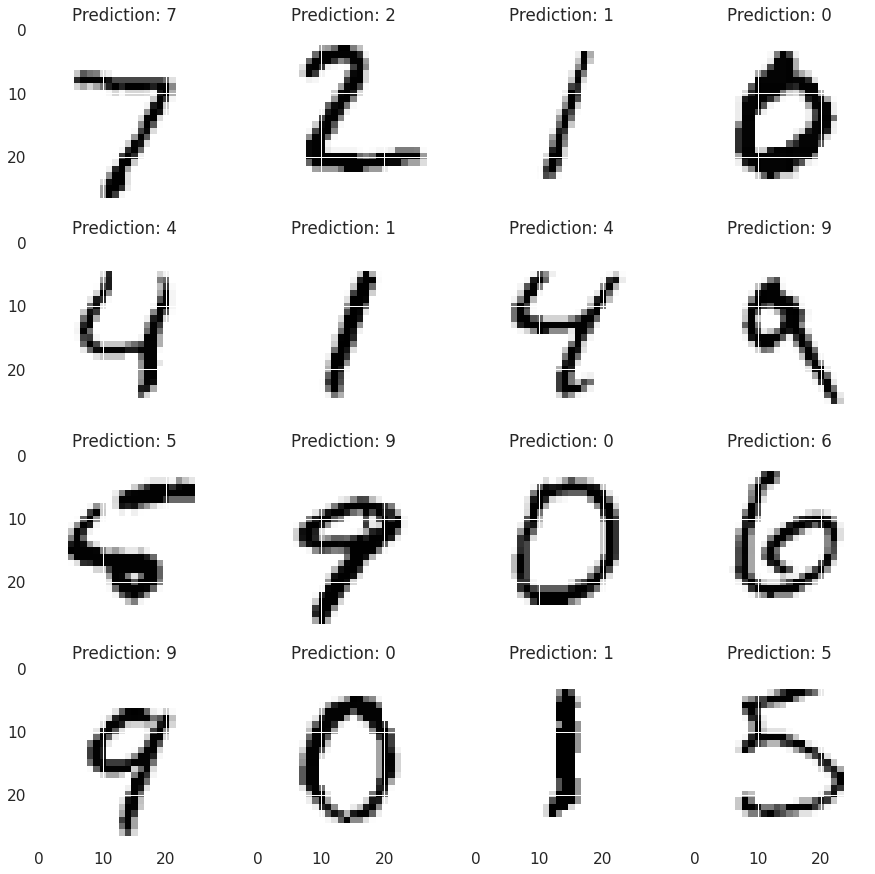

In [109]:
def predict(model, X, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'Prediction: {y_pred}')

predict(best, X_test, 16)
